# Logistische Regressie
### Uitwerking en Evaluatie

In deze notebook wordt met behulp van een dataset verkregen van Kaggle een uitwerking van logistische regressie
uitgevoerd. De uitwerking wordt vergeleken met die van de naive methodiek om te toetsen hoe goed het model is.


<b>Formules voor simpele logistische regressie:</b>

\begin{equation}
\ p(x) = \frac{1}{1 + e^{-(\beta_i x_i + {m_i})}}
\end{equation}

<u>Of equivalent in odds:</u>

\begin{equation}
\ odds = e^{\beta_i x_i + {m_i}}
\end{equation}

<u>De logit van de odds:</u>

\begin{equation}
\ log(odds) = \beta_i x_i + {m_i}
\end{equation}



<b>Formules voor multiple logistiche regressie</b>

\begin{equation}
\ p(x) = \frac{1}{1 + e^{-(\beta_0 x_i{_0} + \beta_1 x_i{_1}... + \beta_p x_i{_p} + {m_i})}}
\end{equation}

<u>Of equivalent in odds:</u>

\begin{equation}
\ odds = e^{\beta_0 x_i{_0} + \beta_1 x_i{_1}... + \beta_p x_i{_p} + {m_i}}
\end{equation}

<u>De logit van de odds: </u>

\begin{equation}
\ log(odds) = \beta_0 x_i{_0} + \beta_1 x_i{_1}... + \beta_p x_i{_p} + {m_i}
\end{equation}

Voordat aan de uitwerking en evaluatie kan worden begonnen zullen enkele libraries worden geimport.


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


### Voorbeeld uitwerking
Met de iris dataset van sci-kit-learn kunnen we een voorbeeld van Logistical Regression uitwerken. De data van X heeft
meerdere attributen dus we doen bij het voorbeeld Multiple Logistiscal Regression.


Als eerste initialiseren we de data en het LogisticRegression object.


In [2]:
data_X, data_y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')


##### Trainen
Het model is gebouwd, nu kunnen we data erop trainen via de .fit() methode.


In [3]:
clf.fit(data_X, data_y)


/Users/tim/Developer/Pycharm/Datascience-Opdrachten/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Voorspellen

Nu kunnen we proberen te voorspellen met wat van de originele data:


In [4]:
clf.predict(data_X[:2, :])


array([0, 0])

Via de .predict_proba() methode kunnen we de probabilities van ieder attribuut zien van de eerste 2 twee cases.
Er zijn 4 predictors dus is er per set van 2 een probability dus zijn er 3 probabilities


In [5]:
print(data_X[:2, :])
clf.predict_proba(data_X[:2, :])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]


array([[9.81802911e-01, 1.81970751e-02, 1.43580537e-08],
       [9.71729527e-01, 2.82704429e-02, 3.00353141e-08]])


##### Score

Als laatst kunnen we de score bekijken van hoe goed het model werkt met een gegeven dataset.


In [6]:
clf.score(data_X, data_y)


0.9733333333333334

## Uitwerking dataset

Er is gekozen voor een dataset van Kaggle: pokémon.

Link naar dataset: https://www.kaggle.com/abcsds/pokemon/downloads/pokemon.zip/2

Met deze dataset gaat worden geprobeerd te voorspellen of: 
> "<i>Afhankelijk van de stats van een pokémon, die pokémon als legendary kan worden geclassificeerd."</i>

Er zijn ook andere velden zoals de eerste en mogelijke tweede type van een pokémon. Deze worden echter niet meegenomen omdat niet alle pokemon een tweede type hebben, dit kan voor problemen in het model zorgen. 


In [7]:
data = pd.read_csv('data/pokemon.csv')
data_indexed = data.set_index('Name')
data_sorted = data.sort_values('Total')
data_filterd = data_sorted.filter(['Total', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary'])

##### Splitsen van data

Nu de data uit het csv-bestand is gehaald kan de data gesplitst worden in X en y zoals te zien was in het voorbeeld. Deze X en y data kunnen we vervolgens in trainings en test data splitsen om het model te trainen en te testen.

In [8]:
data_X = data_filterd.copy()
data_y = pd.DataFrame(data_X.pop('Legendary'))
data_y.head()

,Legendary
206,False
322,False
446,False
288,False
16,False


In [9]:
data_X.head()

,Total,Attack,Defense,Sp. Atk,Sp. Def,Speed
206,180,30,30,30,30,30
322,190,20,40,20,40,20
446,194,25,41,25,41,25
288,195,45,35,20,30,20
16,195,35,30,20,20,50


#### Opsplitsen in train en test data
Nu de X en y data is gesplitst kunnen we de trainingsdata ervan maken via train_test_split() functie van sci-kit-learn. Deze wordt geimporteerd en toegepast op de X en y data. Hier komen vier variabelen uit:
- Test en trainings data voor X
- Test en trainings data voor y

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.33)

#### Aanmaken en trainen van het Model
Net als in het voorbeeld moet het object voor de Logistische Regressie worden geinitaliseerd en worden getraind.

In [22]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
LR_model.fit(X_train.values, y_train.values.ravel())
LR_model.coef_


array([[ 0.01729808, -0.01142147,  0.00145811, -0.00038669,  0.00419958,
         0.01150427]])

##### Score
Sci-kit-learn heeft een ingebouwde .score() methode voor de Logistische Regressie model. Deze score wordt berekent door het aantal cases te bepalen die verkeerd zijn voorspelt en deze eruit te halen, deze grote van deze populatie wordt met het totaal gedeeld en daar komt dus een waarde tussen de 0 en 1 uit. 

In [12]:
score = LR_model.score(X_test.values, y_test.values.ravel())
print(f"De score van het LR_model is: {score*100:.2f}% ({score:.4f})")

De score van het LR_model is: 93.94% (0.9394)


De score van 95% houdt dus in dat in 95% van de gevallen het model een goeie voorspelling doet.

##### Inkijk op de data

Zoals te zien met behulp van de .head() methode van geconstructeerde Dataframe van test waardes en de voorspellingen, is te zien dat ook niet legendaries goed worden voorspeld. Kort gezegd heeft het model ergens een omklap waarde voor wanneer een pokémon als legendary wordt geclassificeerd.

In de volgende paragraaf worden de resultaten visueel getoond in een plot.

In [13]:
predictions = LR_model.predict(X_test)
predictions_df = y_test.copy()
predictions_df['Voorspelling LR'] = predictions
predictions_df.head()

,Legendary,Voorspelling LR
310,False,False
320,False,False
46,False,False
291,False,False
462,False,False


##### De voorspelling visualiseren
Om een betere grip op het model te krijgen worden de resultaten van het model geplot door middel van MatPlotLib en twee scatter plots.

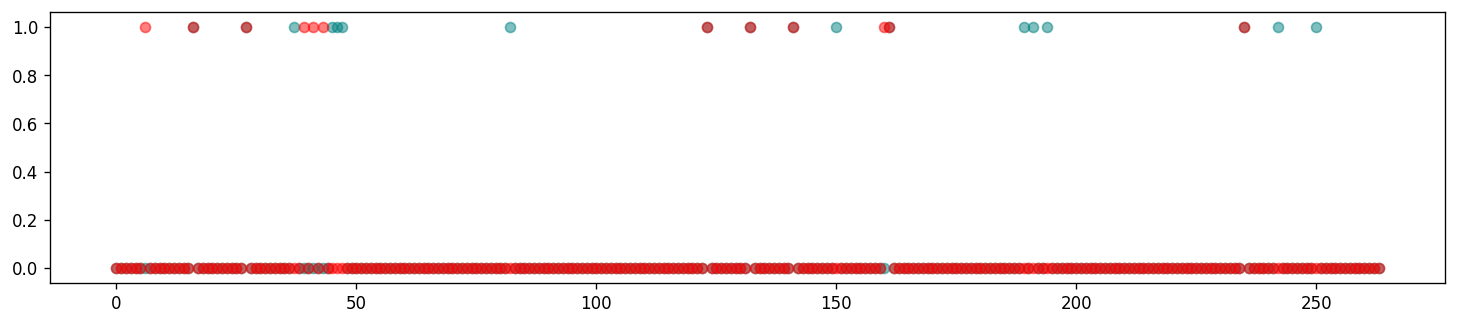

In [14]:
%matplotlib inline

from matplotlib import pyplot as plt

x = np.arange(len(predictions_df))

plt.figure(figsize=(15,3), dpi=120)
plt.scatter(x, predictions_df['Legendary'], c='teal', alpha=0.5)
plt.scatter(x, predictions_df['Voorspelling LR'], c='red', alpha=0.5)
plt.show()

Overal waar punten overelkaar heen zijn dus goeie voorspellingen. Het model wordt in de Evaluatie verder uitgepluisd met verschillende methodieken.

## Evaluatie
In de evaluatie gaan we naar enkele berekeningen kijken die de correctheid van het model impliceren.

Om een begrip te krijgen aan de aantallen van de fout voorspelt, goed voorspelt etc. wordt een confusion matrix getoond.

In [20]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(predictions_df['Legendary'], predictions_df['Voorspelling LR']).ravel()

print(f"Goed voorspelt  : {tp}")
print(f"legendary maar geen sterke pokémon : {fp}")
print(f"Sterke pokémon maar geen legedary : {fn}")
print(f"Geen legendaries  : {tn}")

Goed voorspelt  : 7
legendary maar geen sterke pokémon : 5
Sterke pokémon maar geen legedary : 11
Geen legendaries  : 241


Deze waardes kunnen we in een markdown tabel zetten door handmatig wat Juypter (IPython) code te schrijven. Als notitie: in dit geval zijn onze True Negatives eigenlijk ook goeie voorspellingen, maar dat wordt bij een confusion matrix geen rekening bij gehouden. Want dit zijn nogsteeds pokémon die goed zijn geclassificeerd.

In [21]:
from IPython.display import Markdown as md

md(f"""
| *confusion matrix* | Goed voorspelt | slecht voorspelt |
| --- | --- | --- |
| **legendary pokémon** | {tp} | {fn} |
| **niet legendary pokémon** | {fp} | {tn}|
""")


| *confusion matrix* | Goed voorspelt | slecht voorspelt |
| --- | --- | --- |
| **legendary pokémon** | 7 | 11 |
| **niet legendary pokémon** | 5 | 241|


#### Metrics
De r^2 methode kan niet worden berekent omdat bij Logistische Regressie er geen 'residual' heeft om de score te berekenen. Hiervoor moet je de 'maximum likelihood' berekenen. Overige Metrics zoals de <i>Root Mean Squared Error</i> zeggen niks over het model omdat de waardes <i>binominaal</i> zijn: waar of niet waar. Het probleem ligt er dus in dat de waardes van de voorspellingen niet goed passen.

<u>Er zijn methodes om een LR model te beoordelen.</u>
1. ROC Curve (lift chart)
2. classification matrix

Deze methodes worden verder in de Evaluatie getoond en uitgelegd.

##### ROC curve

In deze paragraaf wordt een ROC curve uitgewerkt van het model vergeleken met het gemiddelde (naive methodiek) van het LR_model, oftwel 50/50 en dus een lijn met een r.c. van 1 door de oorsprong. We gebruiken RandomTreesEmbedding om de data wat meer random te verdelen tijdens de het maken van de pipeline en dit model te trainen.

API referentie: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomTreesEmbedding.html

</br>
</br>

RandomTreesEmbedding van de sci-kit-learn website:

> An unsupervised transformation of a dataset to a high-dimensional sparse representation. A datapoint is coded according to which leaf of each tree it is sorted into. Using a one-hot encoding of the leaves, this leads to a binary coding with as many ones as there are trees in the forest.

Waarom hier voor gekozen? Het doel is om de curve wat te laten worden bepaald op iets willekeurigs zodat als er een bias zit in de volgorde van de pokémon, wat zeer mogelijk kan zijn aangezien de legendaries altijd op het einde van de pokémon dex staan. Dooruit dit document heb is steeds geprobeerd de volgorde te veranderen om de bias eruit te halen. Met RandomTreesEmbeding is dit hopelijk de laatste slag op de kop.

De n_estimator staat op 10 omdat uit enkele keren handmatig testen deze waarde het meest op de beste curve uitkwam.

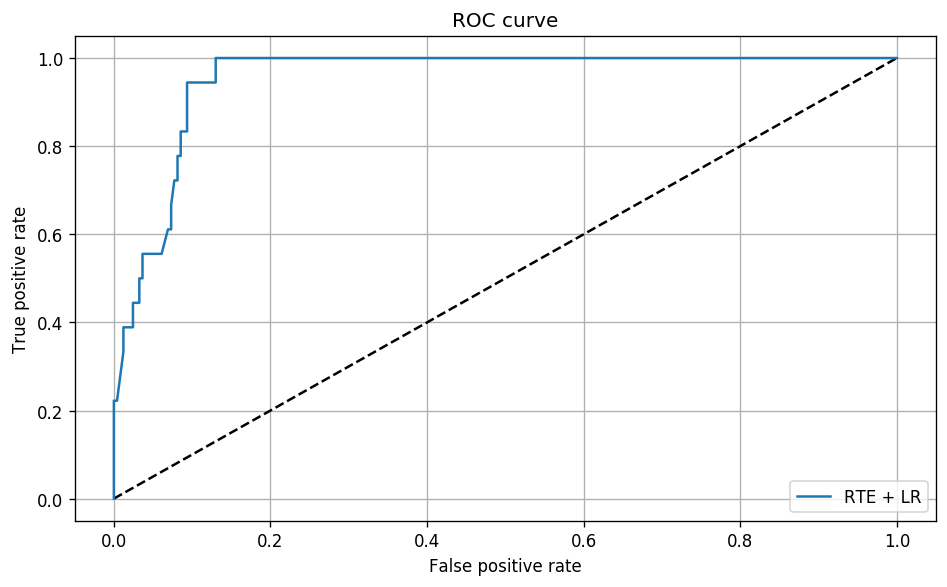

In [17]:
%matplotlib inline

from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomTreesEmbedding

# constanten voor de plot
n_estimator = 10

# Unsupervised transformation based on totally random trees (RTE)
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator, random_state=0)

pipeline = make_pipeline(rt, LR_model)
pipeline.fit(X_train, y_train.values.ravel())
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test.values.ravel(), y_pred_rt.ravel())

# opzetten van de grafiek
plt.figure(figsize=(8,5), dpi=120)

# plot de rechte lijn (naive bayes) en de roc curve van het LR_model
plt.plot([0, 1], [0, 1], 'k--', label='')
plt.plot(fpr_rt_lm, tpr_rt_lm, label='RTE + LR')

# instellingen voor de grafiek
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()

# Toon de grafiek
plt.tight_layout()
plt.show()

##### Classification Matrix
In sci-kit-learn is een functie die een soortgelijke actie onderneemt, deze functie heet classification_summary en die is te vinden in de metrics gedeelte.

API referentie: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Informatie van sci-kit-learn:
> Build a text report showing the main classification metrics

Met de classification summary kunnen we row kijken wat voor impact het op had.

In [19]:
from sklearn.metrics import classification_report

names=["Niet legendary", "Legendary"]
print(classification_report(predictions_df['Legendary'], predictions_df['Voorspelling LR'], target_names=names))


                precision    recall  f1-score   support

Niet legendary       0.96      0.98      0.97       246
     Legendary       0.58      0.39      0.47        18

      accuracy                           0.94       264
     macro avg       0.77      0.68      0.72       264
  weighted avg       0.93      0.94      0.93       264



Zoals te zien is de f1 score van de accruacy en weighted average hetzelfde wat een goeie indicator is dat het model goed werkt. De f1 score is het harmonisch gemiddelde van de precision en de recall. 

f1 referentie: https://en.wikipedia.org/wiki/F1_score


## Conclusie

Al om al is te zeggen dat het model goeie voorspellingen doet, het is echter sinds de introductie van Mega evoluties bepaalde pokémon tijdens een gevecht hogere stats kunnen krijgen. Dit houdt in dat het model deze pokémon met een tijdelijke boost in kracht, snelheid en verdediging als Legendary classificeerd. Ook zijn er enkele Legendary pokémon dat gewoon baggere stats hebben en dus niet als Legendary worden geclassificeerd. 

Stats zijn een goeie indicator of een pokémon Legendary is of niet, maar het is niet alles zeggend, iedere pokémon heeft een bepaald verhaal achter zich wat het Legendary maakt of niet, daarom kan afhankelijk van alleen de stats er geen perfect model worden gemaakt om pokémon wel of niet als legendary te classificeren.